# Download and preprocess the CIFAR-10 dataset using the keras.datasets package.

In [1]:
import numpy as np
import keras
from keras.datasets import cifar10
from sklearn.neighbors import KNeighborsClassifier

# Download and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Flatten the images
x_train = x_train.reshape((50000, -1))
x_test = x_test.reshape((10000, -1))


In [2]:
# Train a k-NN model on the CIFAR-10 dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, np.argmax(y_train, axis=1))


KNeighborsClassifier()

In [10]:
# Evaluate the accuracy of the k-NN model on the test set
test_accuracy = knn.score(x_test, np.argmax(y_test, axis=1))
print('Test accuracy:', test_accuracy)


Test accuracy: 0.3398


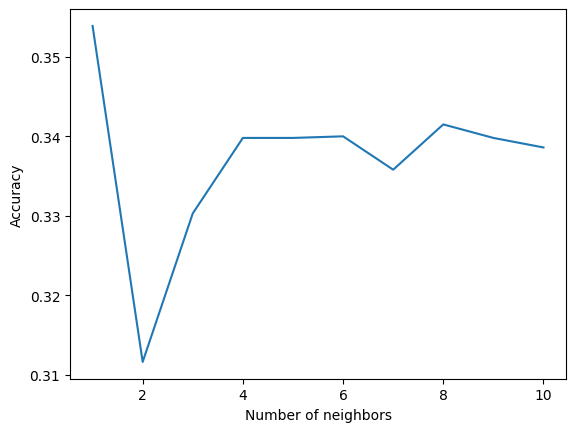

In [11]:
import matplotlib.pyplot as plt

# Plot the accuracy of the k-NN model as a function of the number of neighbors
accuracies = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, np.argmax(y_train, axis=1))
    accuracy = knn.score(x_test, np.argmax(y_test, axis=1))
    accuracies.append(accuracy)

plt.plot(range(1, 11), accuracies)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
